#Cleaning Data

## 1. Data in Python Request

* Read in data from the Excel spreadsheet (default of credit card clients.xlsx) and put into a Pandas DataFrame
* Check the data type of each column
* Convert object columns into numeric or datetime columns, as needed

In [3]:
import pandas as pd

In [4]:
df = pd.read_excel('default of credit card clients.xls', header=1)
# The original first row is now the header, we need to drop the new first row which is the original header row data.
df = df.drop(0)
# Rename the 'ID' column for clarity
df = df.rename(columns={'ID': 'Client_ID'})
df.head()

,Client_ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0


In [5]:
df.dtypes

,0
Client_ID,int64
LIMIT_BAL,int64
SEX,int64
EDUCATION,int64
MARRIAGE,int64
AGE,int64
PAY_0,int64
PAY_2,int64
PAY_3,int64
PAY_4,int64


## 2. Missing Data Check

* Find any missing data
* Deal with the missing data

In [6]:
# check for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 1 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Client_ID                   29999 non-null  int64
 1   LIMIT_BAL                   29999 non-null  int64
 2   SEX                         29999 non-null  int64
 3   EDUCATION                   29999 non-null  int64
 4   MARRIAGE                    29999 non-null  int64
 5   AGE                         29999 non-null  int64
 6   PAY_0                       29999 non-null  int64
 7   PAY_2                       29999 non-null  int64
 8   PAY_3                       29999 non-null  int64
 9   PAY_4                       29999 non-null  int64
 10  PAY_5                       29999 non-null  int64
 11  PAY_6                       29999 non-null  int64
 12  BILL_AMT1                   29999 non-null  int64
 13  BILL_AMT2                   29999 non-null  int64
 14  BILL_A

In [7]:
# see the rows with missing data
df[df.isna().any(axis=1)]

,Client_ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


In [8]:
print(df.columns)

Index(['Client_ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


## 3. Inconsistent Text & Typos Check

* Find any inconsistent text and typos
* Deal with the inconsistent text and typos

In [9]:
# check the numerical columns
df.describe()

,Client_ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,...,29999.000000,29999.000000,29999.000000,29999.000000,2.999900e+04,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000
mean,15001.000000,167489.238975,1.603720,1.853128,1.551885,35.485883,-0.016767,-0.133838,-0.166172,-0.220641,...,43264.391113,40312.744725,38873.056169,5663.769292,5.921338e+03,5225.855695,4826.237741,4799.547618,5215.676423,0.221174
std,8660.109699,129747.029798,0.489132,0.790361,0.521969,9.217819,1.123760,1.197143,1.196878,1.169149,...,64333.443473,60797.723604,59554.677258,16563.524146,2.304123e+04,17607.229085,15666.396081,15278.535203,17777.736580,0.415044
min,2.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7501.500000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2328.000000,1763.500000,1256.000000,1000.000000,8.330000e+02,390.000000,296.000000,253.500000,118.000000,0.000000
50%,15001.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18105.000000,17074.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.500000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54509.000000,50196.000000,49200.500000,5006.000000,5.000000e+03,4505.000000,4013.500000,4032.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [10]:
# check the categorical columms
# The column 'activity_level' does not exist in this DataFrame.
# df.activity_level.value_counts()

In [11]:
# check the unique values of categorical columns
print("Unique values in SEX column:", df.SEX.unique())
print("Unique values in EDUCATION column:", df.EDUCATION.unique())
print("Unique values in MARRIAGE column:", df.MARRIAGE.unique())

Unique values in SEX column: [2 1]
Unique values in EDUCATION column: [2 1 3 5 4 6 0]
Unique values in MARRIAGE column: [2 1 3 0]


## 4. Duplicate Data Check

* Find any duplicate data
* Deal with the duplicate data

In [12]:
# check for duplicate values
df[df.duplicated()]

,Client_ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


In [13]:
# drop duplicates
df.drop_duplicates()

,Client_ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [14]:
# alternative: save non-duplicates
df = df[~df.duplicated()]
df

,Client_ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


## 5. Outliers Check

* Find any outliers
* Deal with the outliers

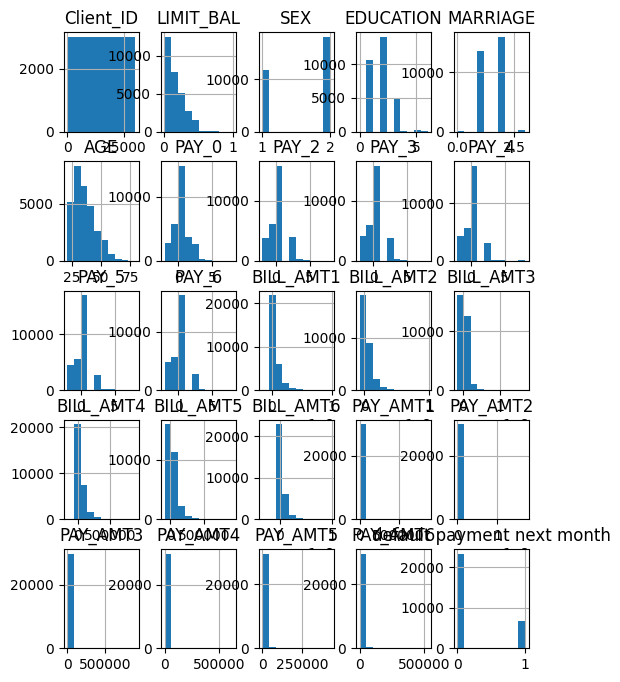

In [15]:
# look at the histograms of all numeric columns
df.hist(figsize = (6,8));

In [16]:
# look at the histogram of the number of snoozes
import seaborn as sns

# sns.histplot(df.number_of_snoozes);

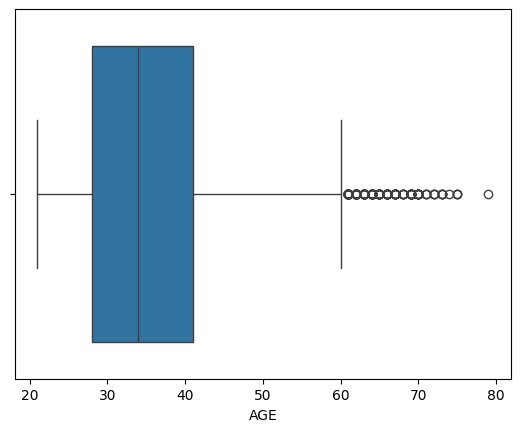

In [18]:
# look at the boxplot of the AGE column
sns.boxplot(x=df.AGE);

In [20]:
print(df.columns)

Index(['Client_ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [22]:
# let's only remove the extreme outlier
# df = df[df.number_of_snoozes < 19]
df

,Client_ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


## 6. Data Issues Check

* Quickly explore the updated DataFrame. How do things look now after handling the data issues compared to the original DataFrame?

In [23]:
# check for missing values
df[df.isna().any(axis=1)]

,Client_ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


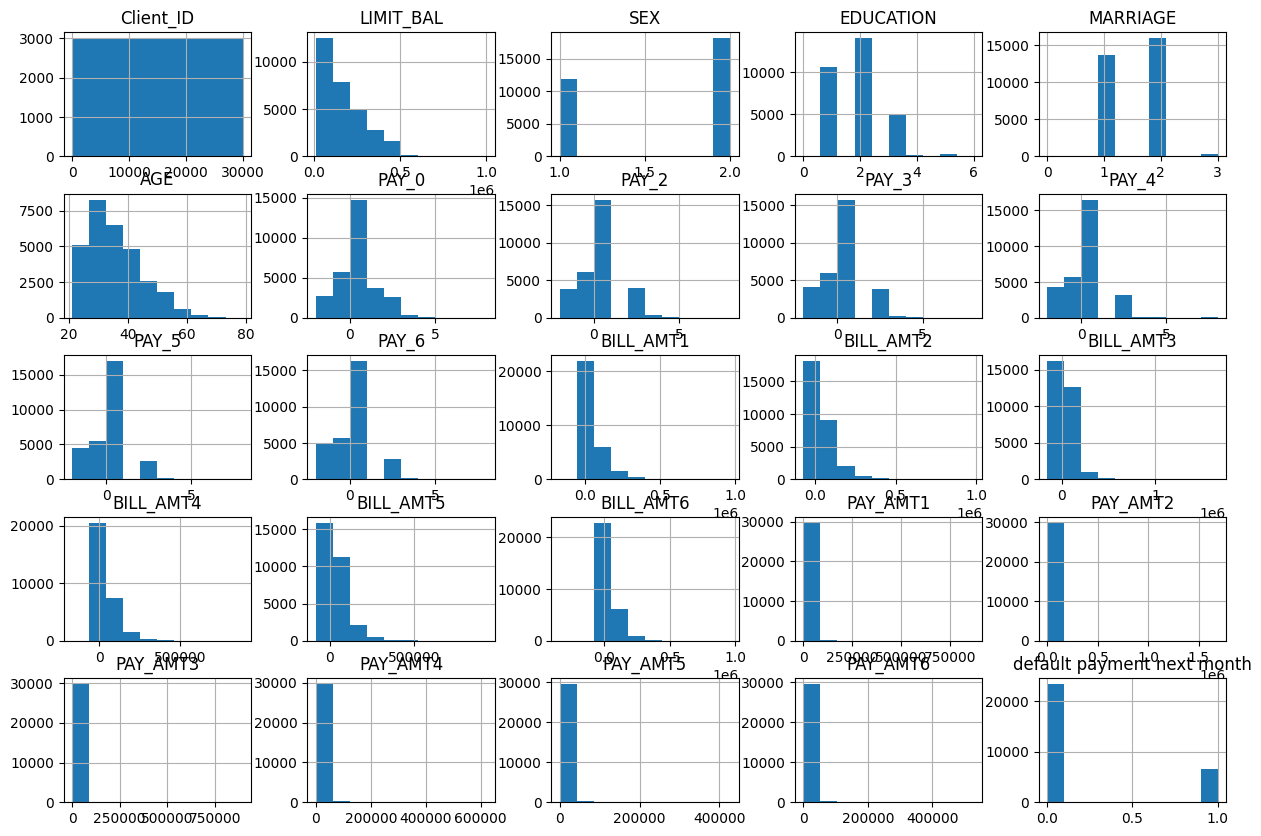

In [24]:
# look at the histograms of all numeric columns
df.hist(figsize = (15,10));

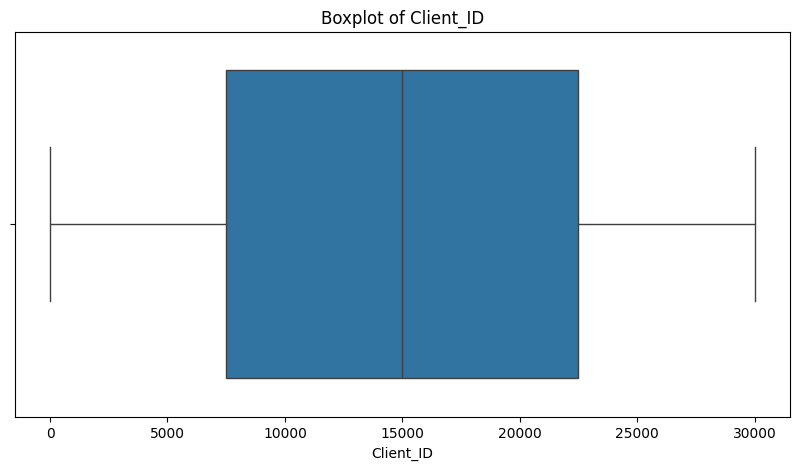

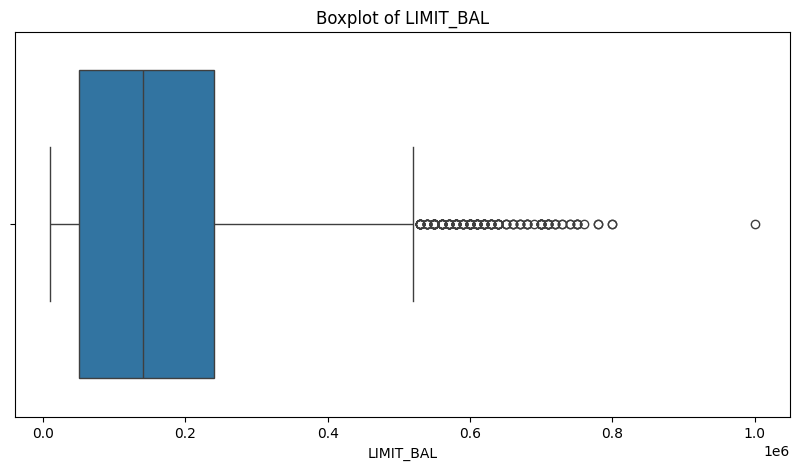

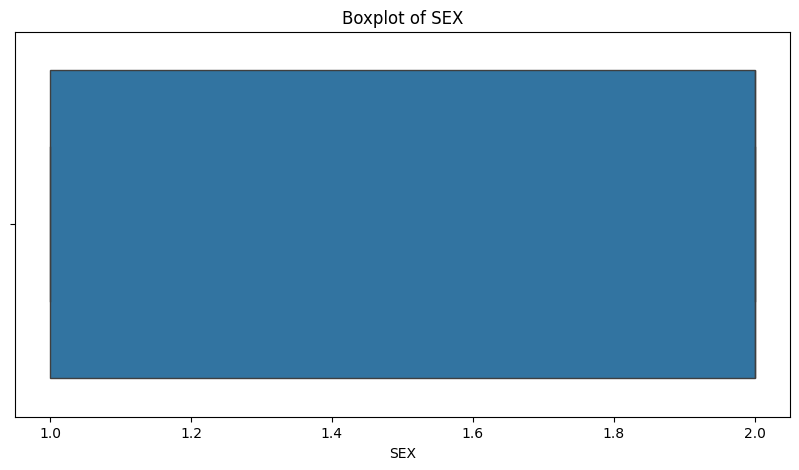

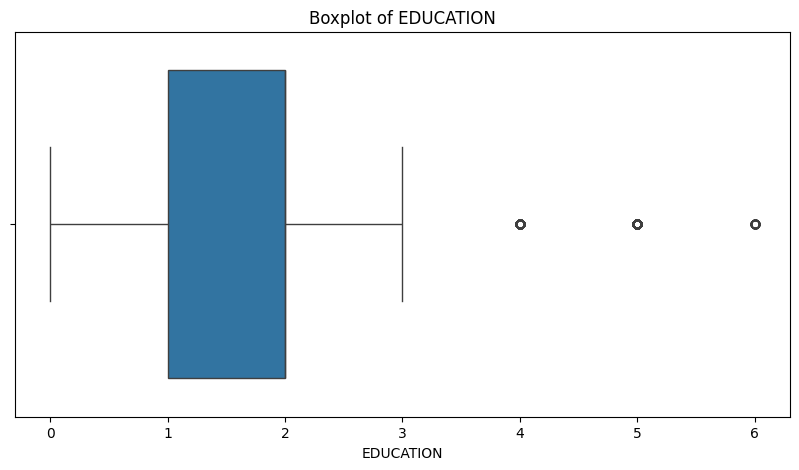

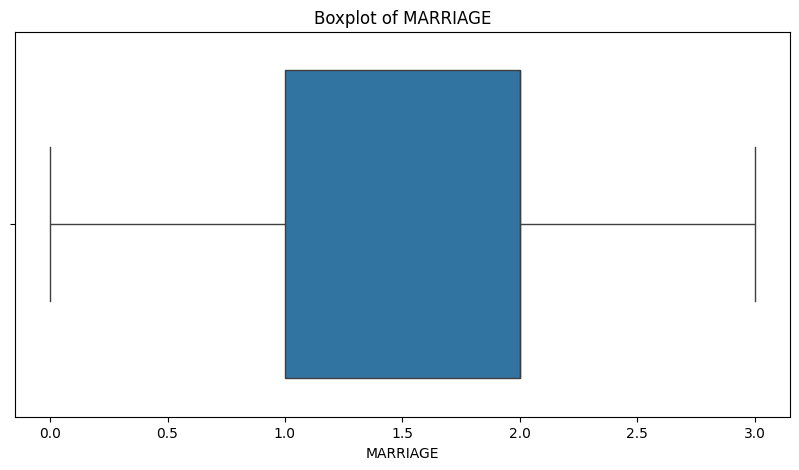

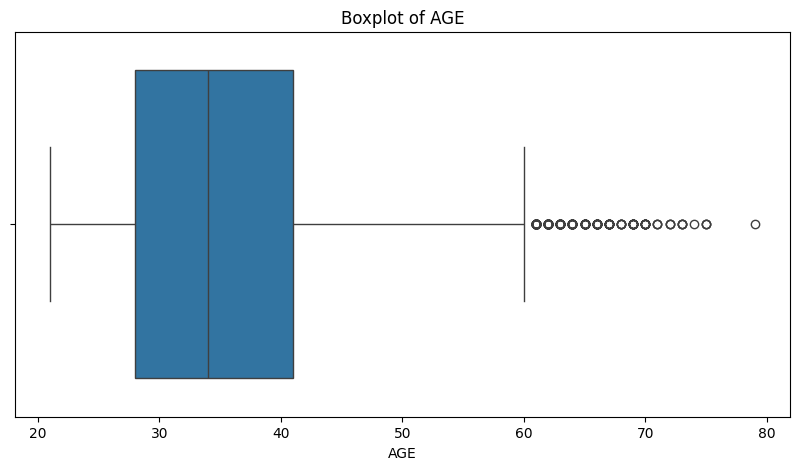

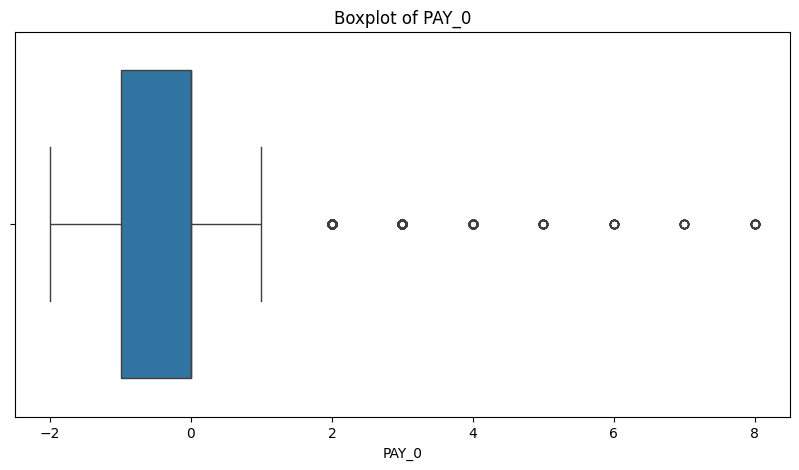

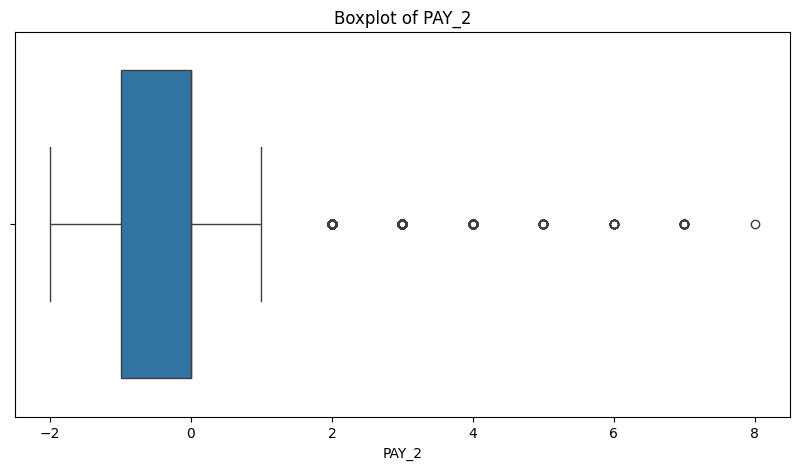

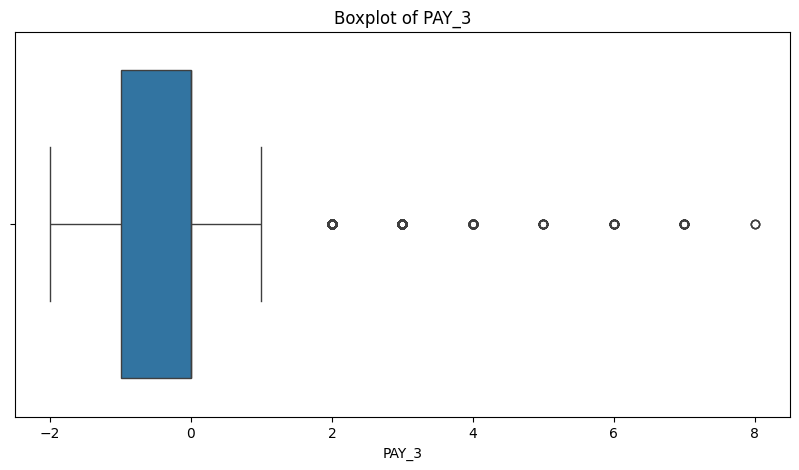

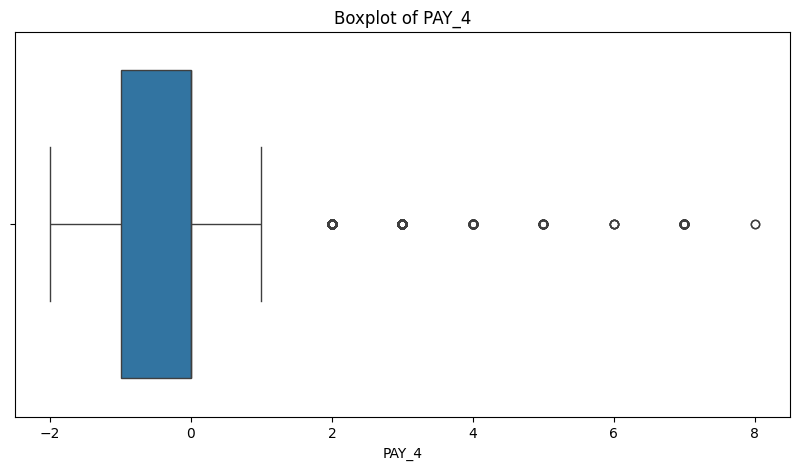

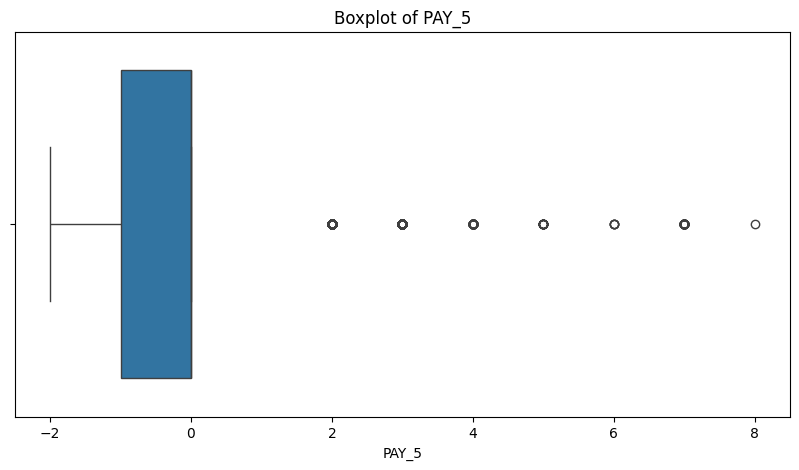

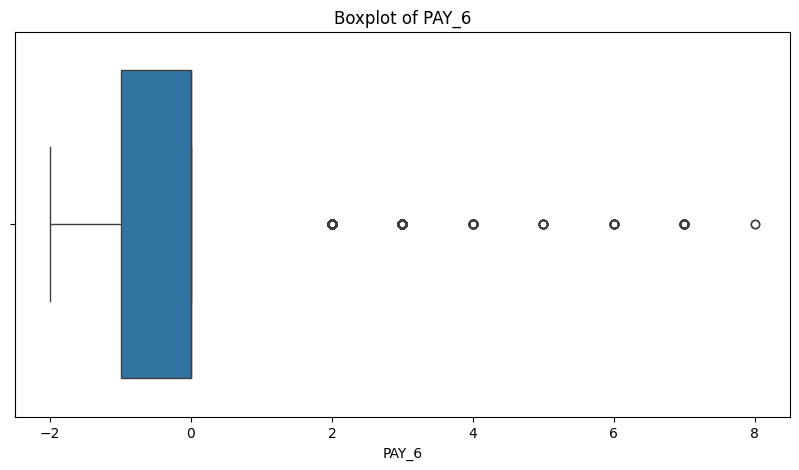

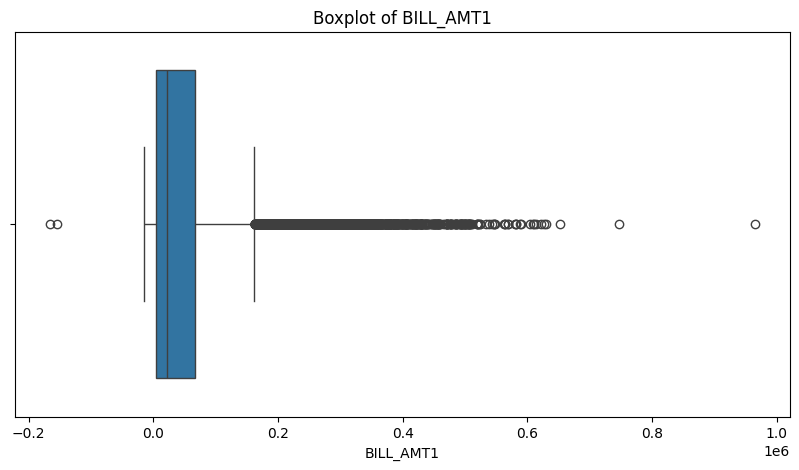

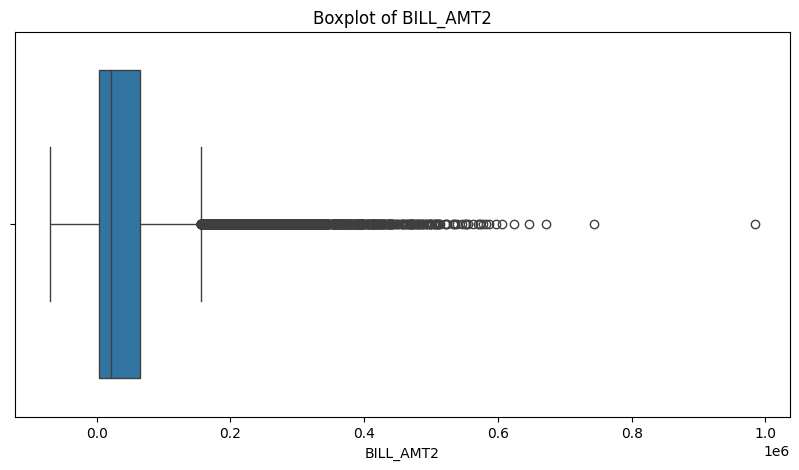

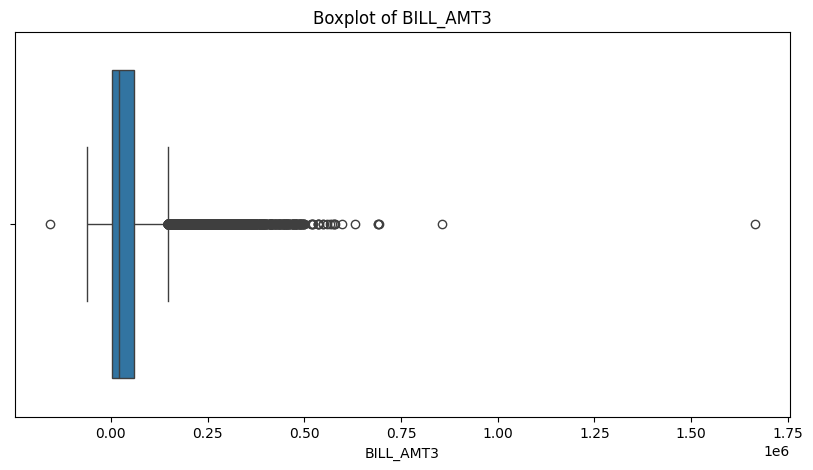

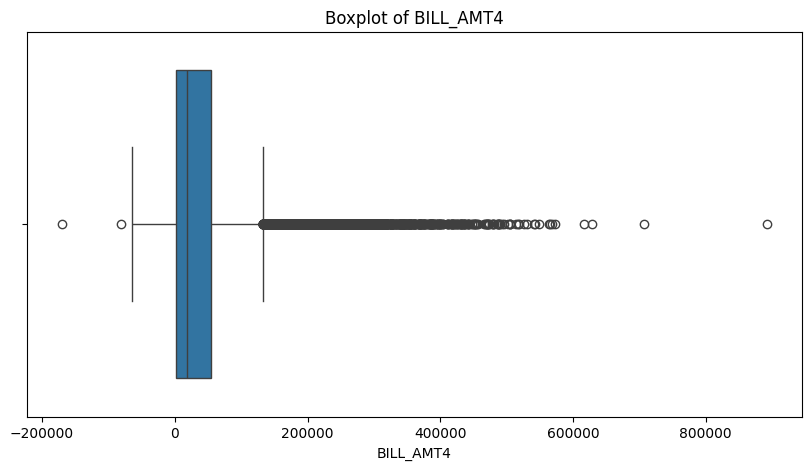

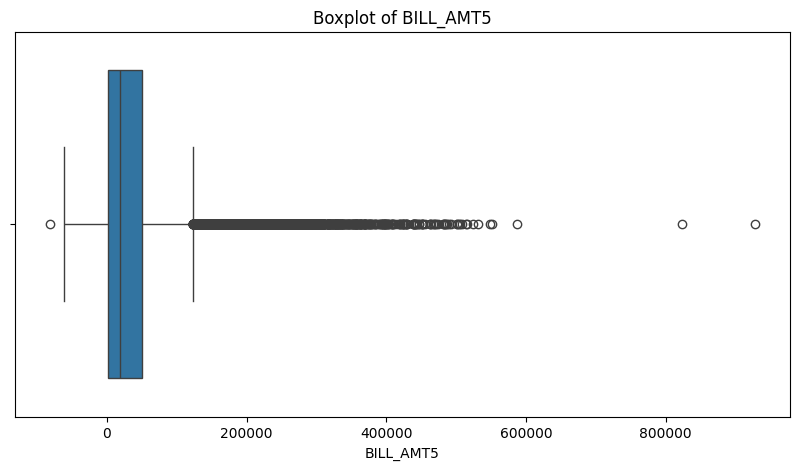

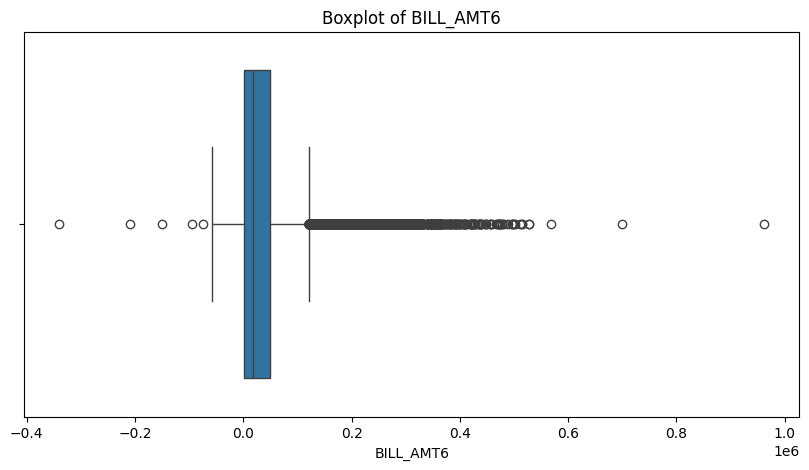

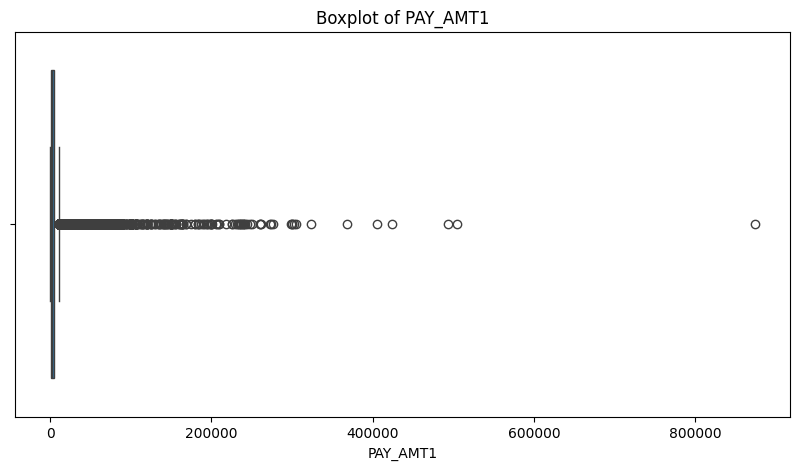

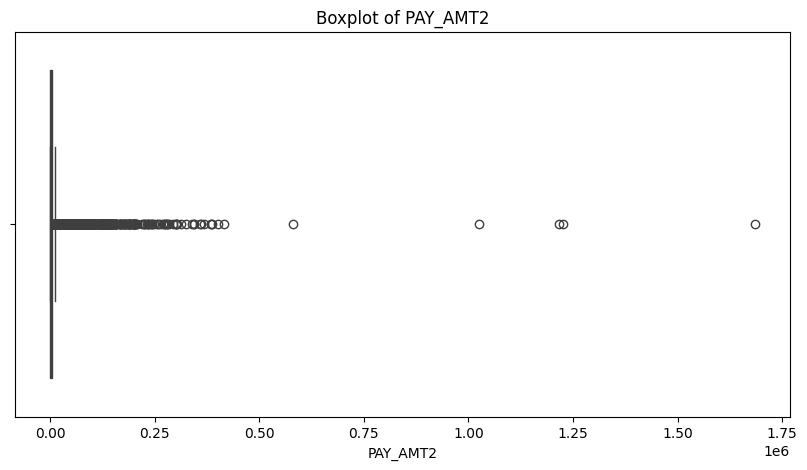

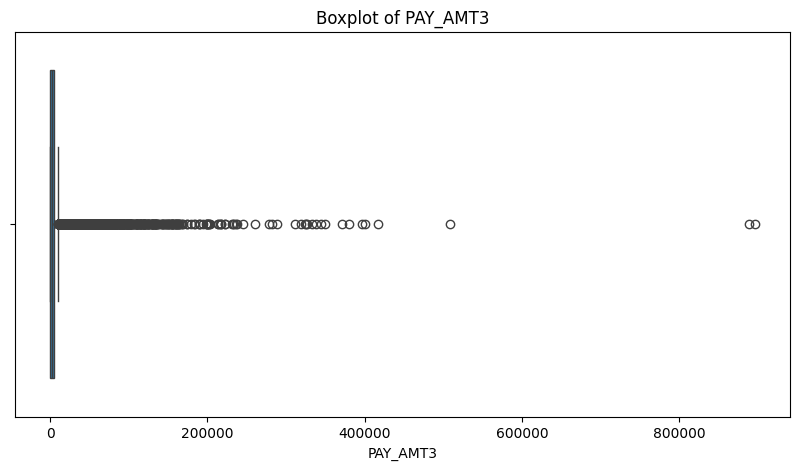

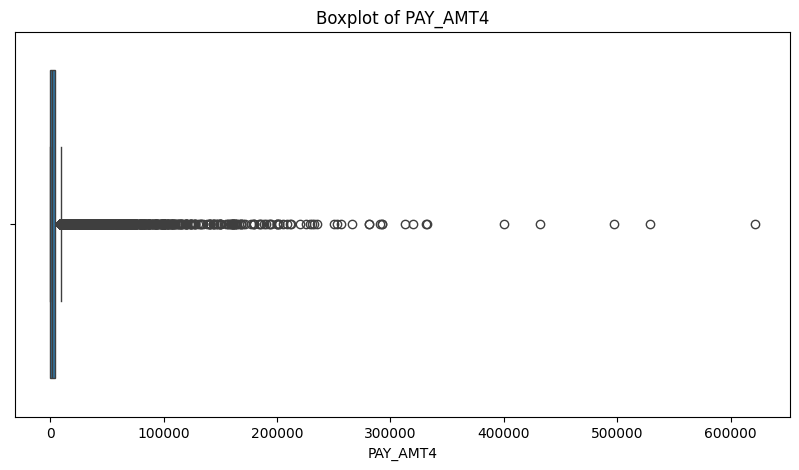

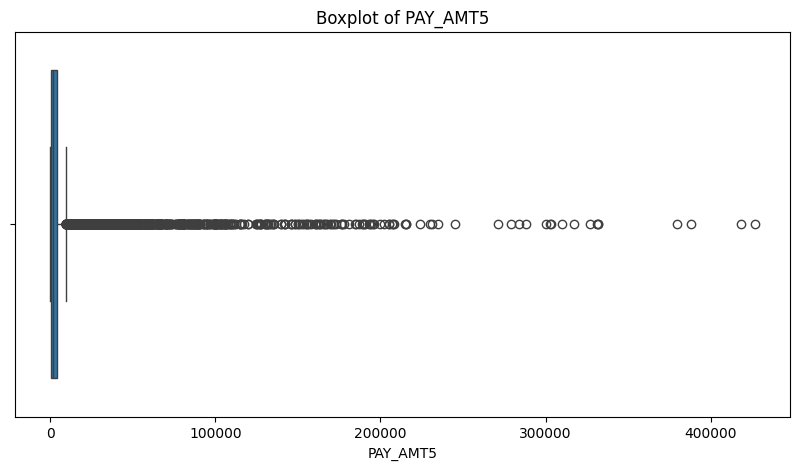

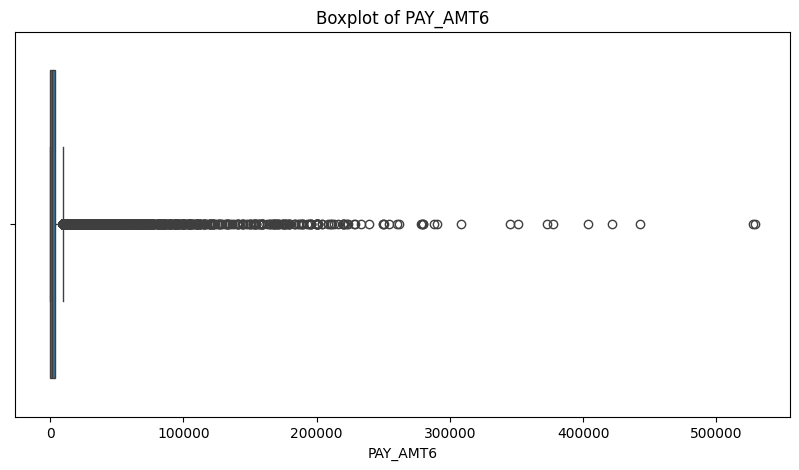

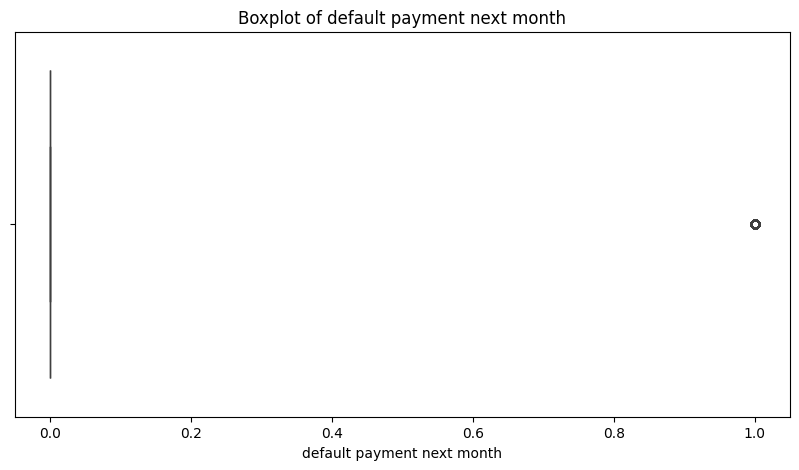

In [25]:
# look at boxplots of numerical columns to see potential outliers
# Select numerical columns for boxplots
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [26]:
# Replace inconsistent values in 'EDUCATION' and 'MARRIAGE' columns
df['EDUCATION'] = df['EDUCATION'].replace({0: 0, 5: 0, 6: 0})
df['MARRIAGE'] = df['MARRIAGE'].replace({0: 0})

# Verify the changes
print("Updated unique values in EDUCATION column:", df.EDUCATION.unique())
print("Updated unique values in MARRIAGE column:", df.MARRIAGE.unique())

Updated unique values in EDUCATION column: [2 1 3 0 4]
Updated unique values in MARRIAGE column: [2 1 3 0]


In [27]:
# check for duplicate values
df[df.duplicated()]

,Client_ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


In [28]:
# check for outliers
df.describe()

,Client_ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,...,29999.000000,29999.000000,29999.000000,29999.000000,2.999900e+04,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000
mean,15001.000000,167489.238975,1.603720,1.796260,1.551885,35.485883,-0.016767,-0.133838,-0.166172,-0.220641,...,43264.391113,40312.744725,38873.056169,5663.769292,5.921338e+03,5225.855695,4826.237741,4799.547618,5215.676423,0.221174
std,8660.109699,129747.029798,0.489132,0.733253,0.521969,9.217819,1.123760,1.197143,1.196878,1.169149,...,64333.443473,60797.723604,59554.677258,16563.524146,2.304123e+04,17607.229085,15666.396081,15278.535203,17777.736580,0.415044
min,2.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7501.500000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2328.000000,1763.500000,1256.000000,1000.000000,8.330000e+02,390.000000,296.000000,253.500000,118.000000,0.000000
50%,15001.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18105.000000,17074.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.500000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54509.000000,50196.000000,49200.500000,5006.000000,5.000000e+03,4505.000000,4013.500000,4032.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [29]:
# first round of data cleaning is complete!
df.head()

,Client_ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0


## 7. Create Columns From Numeric Data

* Read data into Python
* Check the data type of each column
* Create a numeric column using arithmetic
* Create a numeric column using conditional logic

In [30]:
import pandas as pd

# read in data
# Make sure the file 'default of credit card clients.xls' is uploaded to the Colab environment,
# or update the path to where your file is located (e.g., in your Google Drive).
try:
    pens = pd.read_excel('default of credit card clients.xls')
except FileNotFoundError:
    print("Error: 'default of credit card clients.xls' not found.")
    print("Please upload the file to the Colab environment or update the file path.")

pens.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [31]:
# check the data types
pens.dtypes

,0
Unnamed: 0,object
X1,object
X2,object
X3,object
X4,object
X5,object
X6,object
X7,object
X8,object
X9,object


In [32]:
# create a new column using addition
# The columns 'Pen Cost' and 'Shipping Cost' do not exist in this DataFrame.
# pens['Total Spend'] = pens['Pen Cost'] + pens['Shipping Cost']
# pens.head()

In [34]:
import numpy as np

# create a new column using conditional logic
# pens['Free Shipping'] = np.where(pens['Shipping Cost'] == 0, 'Yes', 'No')
pens.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


## 8. Create Columns From DateTime Data

* Calculate the difference between two datetime columns and save it as a new column
* Take the average of a column

In [35]:
# apply a datetime calculation
# The columns 'Delivery Date' and 'Purchase Date' do not exist in this DataFrame.
# pens['Delivery Time'] = pens['Delivery Date'] - pens['Purchase Date']
# pens.head()

In [36]:
# see the output of a datetime calculation
# pens['Delivery Time'].mean()

## 9. Create Columns From Text Data

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
